In [2]:
#importing libraries
import numpy as np
import pandas as pd
#keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
import matplotlib.pyplot as plt
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split 
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score


from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Dense, Input, Dropout
from keras import Sequential
from keras import regularizers
from keras.layers import Dropout
from keras.utils import to_categorical

# for combining all the hyper-parameters
import itertools 
from time import time
from sklearn.pipeline import Pipeline
from keras import initializers

In [6]:
#Extracting the training and test sets
train_df = pd.read_csv('monks-1-train.csv').to_numpy()
test_df = pd.read_csv('monks-1-test.csv').to_numpy()

In [7]:
#Preparing train_df for training
train_set = train_df[:, 1:7]
train_label = train_df[:, 0]

In [8]:
#Preparing test_df for testing
test_set = test_df[:, 1:7]
test_label = test_df[:, 0]

In [9]:
# test_set.shape ,test_label.shape , train_set.shape , train_label.shape

((431, 6), (431,), (123, 6), (123,))

In [72]:
# one hot encoding 
from keras.utils import to_categorical

def fix_zero(dataset):
  return dataset - 1

def to_one_hot_encoding(dataset):
    fixed_dataset = fix_zero(dataset)
    one_hot_dataset = []
    for column in fixed_dataset.T:
        one_hot_column = to_categorical(column)
        for column_index in range(one_hot_column.shape[1]):
            one_hot_dataset.append(one_hot_column[:,column_index])
    return np.asarray(one_hot_dataset).T

In [78]:
one_hot_train = to_one_hot_encoding(train_set)
one_hot_test  = to_one_hot_encoding(test_set)
# one_hot_train.shape , train_label.shape
# one_hot_test.shape , test_label.shape

In [88]:
def create_model(
                    lr=0.7, 
                    num_hidden_units_1=10,
                    num_hidden_units_2=1, 
                    activation_hidden_1="relu", 
                    activation_hidden_2="relu", 
                    activation_out="softmax", 
                    init_mode=initializers.RandomNormal(mean=0., stddev=1.), 
                    momentum=0.7, 
                    decay=0.01
                ):
    # create model
    model = Sequential()
    initializer = initializers.GlorotNormal(seed=42) # has the parameter of seed to produce the same random sample.
    model.add(Dense(units=num_hidden_units_1, kernel_initializer=initializer, input_dim=17, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    #optimizer
    sgd = SGD(lr=lr, momentum=momentum, nesterov=False)  # We can add decay to hyper parameter list to get optimum value. 

    # Compile model
    model.compile(optimizer=sgd, loss='mean_squared_error', metrics=['accuracy'])
    return model

In [91]:
# screening 
def plot_accuracy_two_params(history, par_a, value_a, par_b, value_b, axs):
    plt.subplot(axs)
    plt.plot(history.history['accuracy'], label='TR_set')
    plt.plot(history.history['val_accuracy'], label='VL_set')
    axs.set_title('Model Accuracy [' + par_a + ' = ' + str(value_a) + '] [' + par_b + ' = ' + str(value_b) + ']' )
    axs.set_ylabel('Accuracy')
    axs.set_xlabel('Epoch')
    axs.legend(loc='best')

def plot_loss_two_params(history, par_a, value_a, par_b, value_b, axs):
    plt.subplot(axs)
    plt.plot(history.history['loss'], label='TR_set')
    plt.plot(history.history['val_loss'], label='VL_set')
    axs.set_title('Model Loss (MSE) [' + par_a + ' = ' + str(value_a) + '] [' + par_b + ' = ' + str(value_b) + ']' )
    axs.set_ylabel('MSE')
    axs.set_xlabel('Epoch')
    axs.legend(loc='best')

def screening_phase(par_a, values_a, par_b, values_b, plot_function=plot_loss_two_params):
    num_values_a = len(values_a)
    num_values_b = len(values_b)
    f, axs = plt.subplots(nrows= num_values_a, ncols=num_values_b, figsize=(8*num_values_b, 5*num_values_a))
    for i in range(num_values_a):
        for j in range(num_values_b):
            params = {par_a : values_a[i], par_b : values_b[j]}
            model = KerasClassifier(build_fn=create_model, **params)
            history = model.fit(one_hot_train, train_label, validation_data=(one_hot_test, test_label), epochs=90, batch_size=10, verbose=0)
            plot_function(history, par_a, values_a[i], par_b, values_b[j], axs[i][j])
    plt.suptitle('Screening phase on ' + par_a + ' and ' + par_b)
    plt.show()



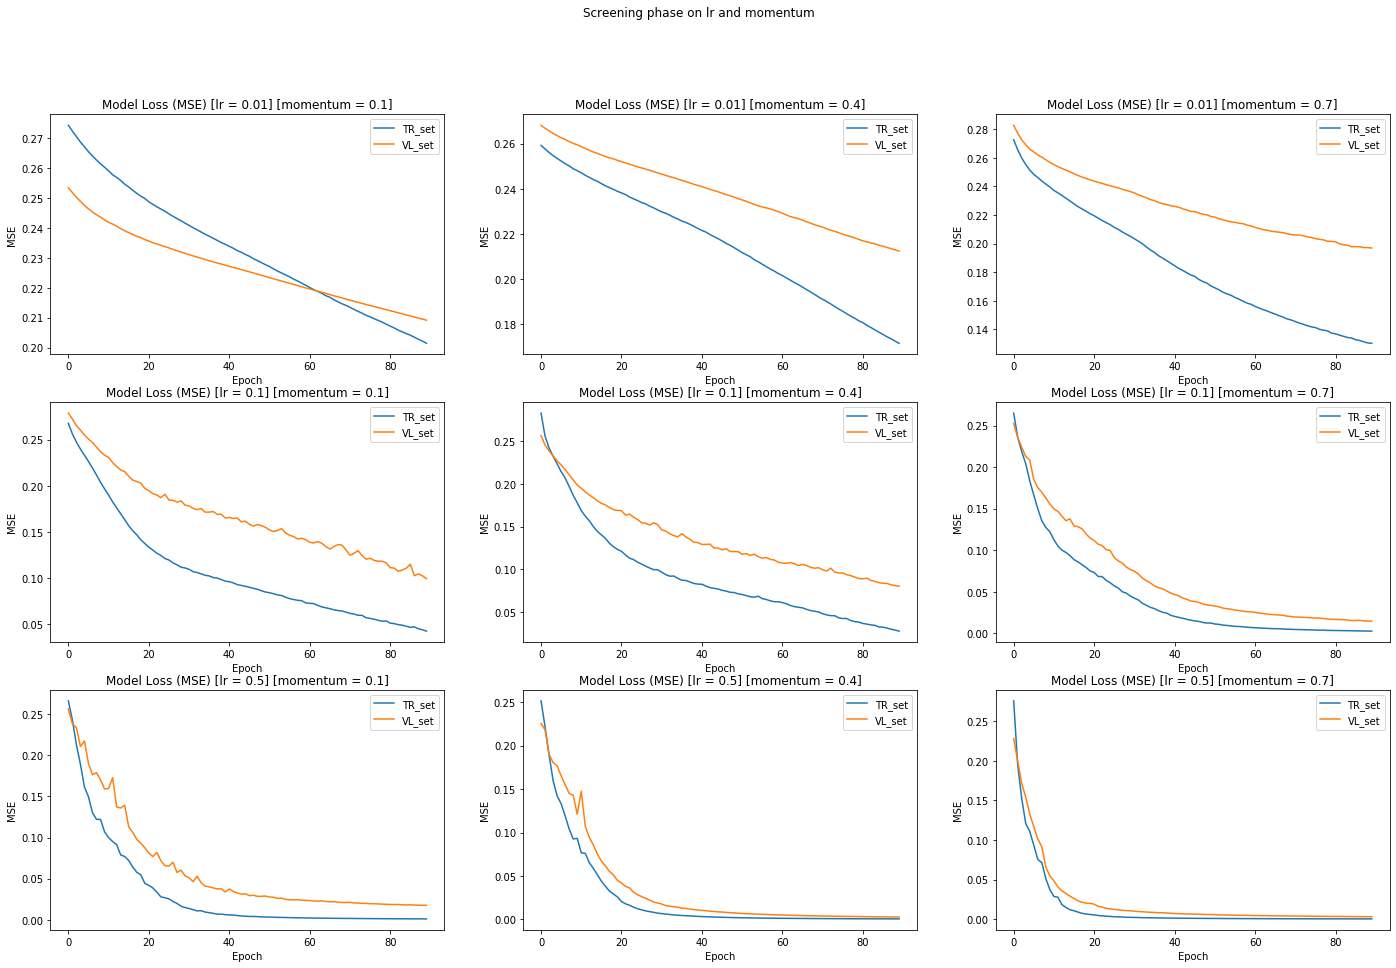

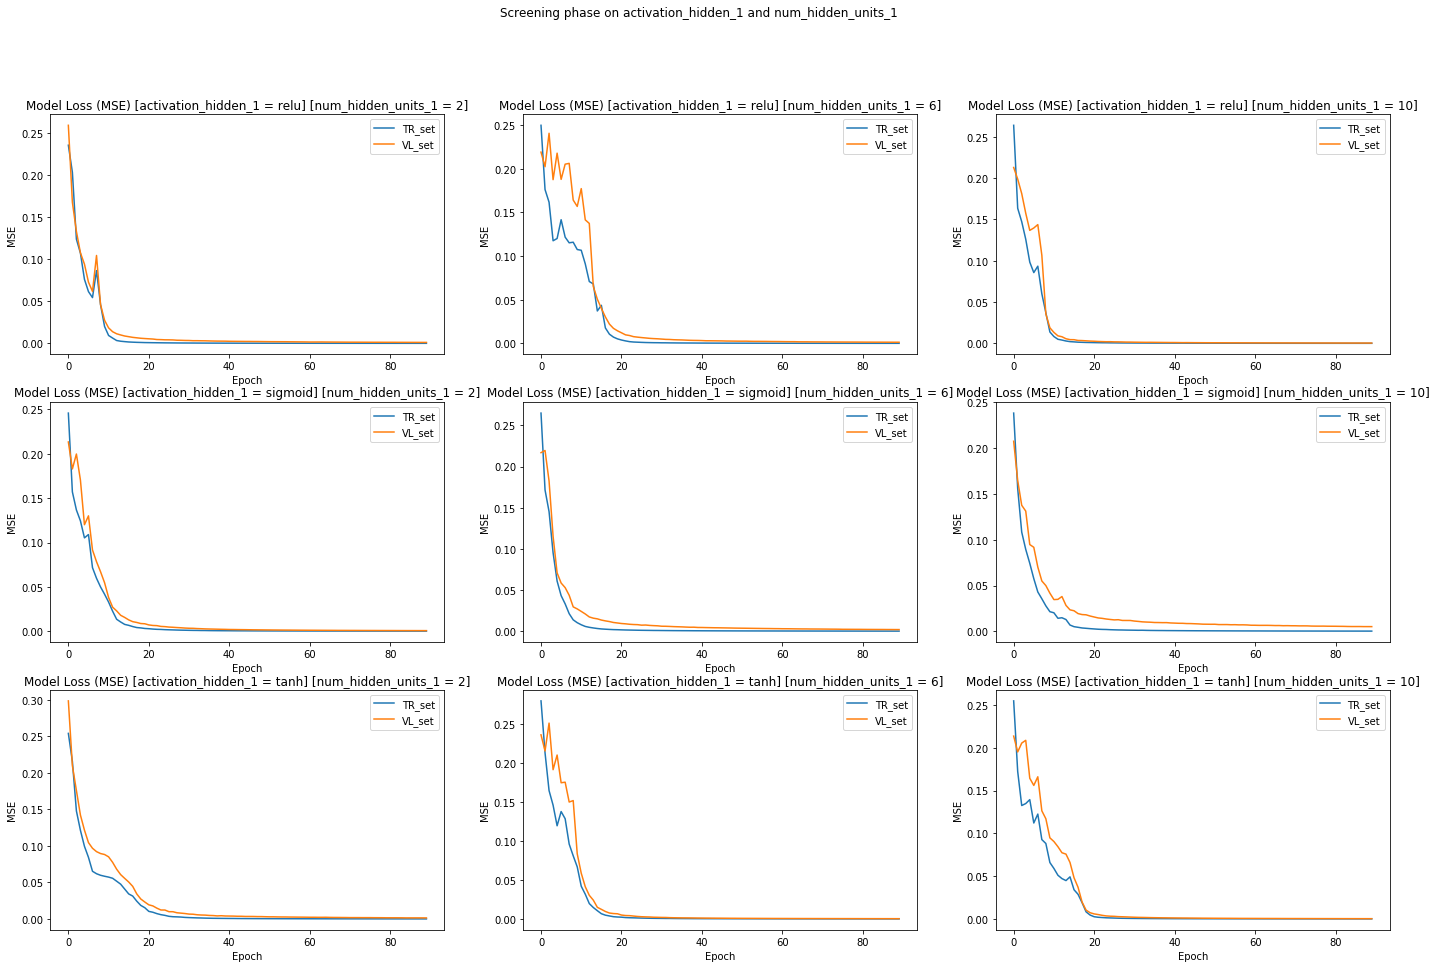

In [92]:
screening_phase('lr', [0.01, 0.1, 0.5], 'momentum', [0.1, 0.4, 0.7])
screening_phase('activation_hidden_1', ['relu', 'sigmoid', 'tanh'], 'num_hidden_units_1', [2, 6, 10]) 

In [76]:
model = Sequential()
initializer = initializers.GlorotNormal(seed=42) # has the parameter of seed to produce the same random sample.
model.add(Dense(units=10, kernel_initializer=initializer, input_dim=17, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
sgd = SGD(lr= 0.7, momentum=0.7, nesterov=True)
model.compile(optimizer=sgd, loss='mean_squared_error',metrics=['accuracy'])
history = model.fit(one_hot_train, train_label,validation_data=(one_hot_test, test_label), epochs=90, batch_size=10, verbose=1)

Epoch 1/90
13/13 [==============================] - 0s 15ms/step - loss: 0.2452 - accuracy: 0.5528 - val_loss: 0.2205 - val_accuracy: 0.6148
Epoch 2/90
13/13 [==============================] - 0s 6ms/step - loss: 0.1846 - accuracy: 0.7073 - val_loss: 0.1843 - val_accuracy: 0.7587
Epoch 3/90
13/13 [==============================] - 0s 7ms/step - loss: 0.1498 - accuracy: 0.7967 - val_loss: 0.1886 - val_accuracy: 0.7123
Epoch 4/90
13/13 [==============================] - 0s 6ms/step - loss: 0.1094 - accuracy: 0.9024 - val_loss: 0.1326 - val_accuracy: 0.8608
Epoch 5/90
13/13 [==============================] - 0s 6ms/step - loss: 0.0889 - accuracy: 0.9187 - val_loss: 0.1061 - val_accuracy: 0.9049
Epoch 6/90
13/13 [==============================] - 0s 6ms/step - loss: 0.0664 - accuracy: 0.9431 - val_loss: 0.0992 - val_accuracy: 0.9072
Epoch 7/90
13/13 [==============================] - 0s 7ms/step - loss: 0.0606 - accuracy: 0.9431 - val_loss: 0.0879 - val_accuracy: 0.9118
Epoch 8/90
13/13 [=

13/13 [==============================] - 0s 7ms/step - loss: 5.2212e-04 - accuracy: 1.0000 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 59/90
13/13 [==============================] - 0s 6ms/step - loss: 5.1075e-04 - accuracy: 1.0000 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 60/90
13/13 [==============================] - 0s 6ms/step - loss: 4.9632e-04 - accuracy: 1.0000 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 61/90
13/13 [==============================] - 0s 6ms/step - loss: 4.8444e-04 - accuracy: 1.0000 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 62/90
13/13 [==============================] - 0s 6ms/step - loss: 4.7477e-04 - accuracy: 1.0000 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 63/90
13/13 [==============================] - 0s 6ms/step - loss: 4.6480e-04 - accuracy: 1.0000 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 64/90
13/13 [==============================] - 0s 6ms/step - loss: 4.5162e-04 - accuracy: 1.0000 - val_loss: 0.0013 - val_accuracy: 1.00

In [64]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


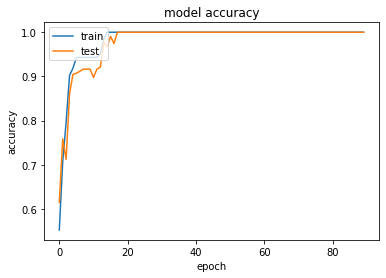

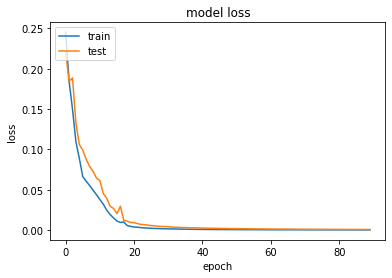

In [77]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

{'lr': [0.5, 0.45, 0.55],
 'momentum': [0.6, 0.7, 0.8],
 'nunite': [5, 6, 7],
 'actvation': ['relu', 'softmax', 'tanh', 'sigmoid'],
 'epoch': [50, 90, 100, 150]}

In [100]:
start=time()
model = KerasClassifier(build_fn=create_model) 

# define the grid search parameters
space = {}
space['lr'] = [0.5,0.45,0.55]
space['momentum'] = [0.6,0.7,0.8]
space['num_hidden_units_1'] = [5,6,7]
space['activation_hidden_1'] = ['relu','softmax','tanh','sigmoid']
space['epochs'] = [50 ,90,100,150] 

grid = GridSearchCV(estimator=model, param_grid=space,n_jobs=-1,cv=3,verbose=2)
# grid = RandomizedSearchCV(model, param_grid,cv=3,verbose=2,return_train_score=False,n_iter=3)
grid_result = grid.fit(one_hot_train, train_label)
end=time()

print("Total Running Time: %f",end-start)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Mean\tSTD\tParams")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
# pd.DataFrame(grid.cv_results_) 

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   13.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   46.6s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 1296 out of 1296 | elapsed:  6.4min finished


Epoch 1/150
4/4 [==============================] - 0s 2ms/step - loss: 0.2533 - accuracy: 0.5366
Epoch 2/150
4/4 [==============================] - 0s 2ms/step - loss: 0.2325 - accuracy: 0.6098
Epoch 3/150
4/4 [==============================] - 0s 1ms/step - loss: 0.2133 - accuracy: 0.6992
Epoch 4/150
4/4 [==============================] - 0s 3ms/step - loss: 0.1907 - accuracy: 0.7805
Epoch 5/150
4/4 [==============================] - 0s 2ms/step - loss: 0.1692 - accuracy: 0.8455
Epoch 6/150
4/4 [==============================] - 0s 2ms/step - loss: 0.1486 - accuracy: 0.8374
Epoch 7/150
4/4 [==============================] - 0s 2ms/step - loss: 0.1387 - accuracy: 0.8293
Epoch 8/150
4/4 [==============================] - 0s 2ms/step - loss: 0.1193 - accuracy: 0.8943
Epoch 9/150
4/4 [==============================] - 0s 2ms/step - loss: 0.1089 - accuracy: 0.9024
Epoch 10/150
4/4 [==============================] - 0s 2ms/step - loss: 0.1006 - accuracy: 0.9106
Epoch 11/150
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 85/150
4/4 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 86/150
4/4 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 87/150
4/4 [==============================] - 0s 1ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 88/150
4/4 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 89/150
4/4 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 90/150
4/4 [==============================] - 0s 1ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 91/150
4/4 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 92/150
4/4 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 93/150
4/4 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 94/150
4/4 [===============

0.682927 (0.099573) with: {'activation_hidden_1': 'relu', 'epochs': 90, 'lr': 0.5, 'momentum': 0.6, 'num_hidden_units_1': 5}
0.593496 (0.109681) with: {'activation_hidden_1': 'relu', 'epochs': 90, 'lr': 0.5, 'momentum': 0.6, 'num_hidden_units_1': 6}
0.626016 (0.120039) with: {'activation_hidden_1': 'relu', 'epochs': 90, 'lr': 0.5, 'momentum': 0.6, 'num_hidden_units_1': 7}
0.626016 (0.057488) with: {'activation_hidden_1': 'relu', 'epochs': 90, 'lr': 0.5, 'momentum': 0.7, 'num_hidden_units_1': 5}
0.569106 (0.094113) with: {'activation_hidden_1': 'relu', 'epochs': 90, 'lr': 0.5, 'momentum': 0.7, 'num_hidden_units_1': 6}
0.593496 (0.041455) with: {'activation_hidden_1': 'relu', 'epochs': 90, 'lr': 0.5, 'momentum': 0.7, 'num_hidden_units_1': 7}
0.658537 (0.130588) with: {'activation_hidden_1': 'relu', 'epochs': 90, 'lr': 0.5, 'momentum': 0.8, 'num_hidden_units_1': 5}
0.666667 (0.116689) with: {'activation_hidden_1': 'relu', 'epochs': 90, 'lr': 0.5, 'momentum': 0.8, 'num_hidden_units_1': 6}


0.617886 (0.160967) with: {'activation_hidden_1': 'softmax', 'epochs': 50, 'lr': 0.45, 'momentum': 0.6, 'num_hidden_units_1': 5}
0.512195 (0.052689) with: {'activation_hidden_1': 'softmax', 'epochs': 50, 'lr': 0.45, 'momentum': 0.6, 'num_hidden_units_1': 6}
0.536585 (0.086806) with: {'activation_hidden_1': 'softmax', 'epochs': 50, 'lr': 0.45, 'momentum': 0.6, 'num_hidden_units_1': 7}
0.626016 (0.132598) with: {'activation_hidden_1': 'softmax', 'epochs': 50, 'lr': 0.45, 'momentum': 0.7, 'num_hidden_units_1': 5}
0.650406 (0.120039) with: {'activation_hidden_1': 'softmax', 'epochs': 50, 'lr': 0.45, 'momentum': 0.7, 'num_hidden_units_1': 6}
0.528455 (0.091981) with: {'activation_hidden_1': 'softmax', 'epochs': 50, 'lr': 0.45, 'momentum': 0.7, 'num_hidden_units_1': 7}
0.569106 (0.050117) with: {'activation_hidden_1': 'softmax', 'epochs': 50, 'lr': 0.45, 'momentum': 0.8, 'num_hidden_units_1': 5}
0.617886 (0.060840) with: {'activation_hidden_1': 'softmax', 'epochs': 50, 'lr': 0.45, 'momentum'

0.626016 (0.080484) with: {'activation_hidden_1': 'tanh', 'epochs': 50, 'lr': 0.5, 'momentum': 0.6, 'num_hidden_units_1': 6}
0.617886 (0.030420) with: {'activation_hidden_1': 'tanh', 'epochs': 50, 'lr': 0.5, 'momentum': 0.6, 'num_hidden_units_1': 7}
0.642276 (0.075395) with: {'activation_hidden_1': 'tanh', 'epochs': 50, 'lr': 0.5, 'momentum': 0.7, 'num_hidden_units_1': 5}
0.536585 (0.052689) with: {'activation_hidden_1': 'tanh', 'epochs': 50, 'lr': 0.5, 'momentum': 0.7, 'num_hidden_units_1': 6}
0.666667 (0.100234) with: {'activation_hidden_1': 'tanh', 'epochs': 50, 'lr': 0.5, 'momentum': 0.7, 'num_hidden_units_1': 7}
0.552846 (0.178492) with: {'activation_hidden_1': 'tanh', 'epochs': 50, 'lr': 0.5, 'momentum': 0.8, 'num_hidden_units_1': 5}
0.634146 (0.091260) with: {'activation_hidden_1': 'tanh', 'epochs': 50, 'lr': 0.5, 'momentum': 0.8, 'num_hidden_units_1': 6}
0.691057 (0.030420) with: {'activation_hidden_1': 'tanh', 'epochs': 50, 'lr': 0.5, 'momentum': 0.8, 'num_hidden_units_1': 7}
